In [6]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D
from tensorflow.keras.layers import Flatten, Dense, Dropout

In [7]:
(x_train, y_train),(x_test, y_test) = cifar10.load_data()

x_train=x_train.reshape(-1, 32, 32, 3)
x_test=x_test.reshape(-1, 32, 32, 3)

print(x_train.shape, x_test.shape)
print(y_train.shape, y_test.shape)

x_train = x_train.astype(np.float32) / 255.0
x_test = x_test.astype(np.float32) / 255.0

(50000, 32, 32, 3) (10000, 32, 32, 3)
(50000, 1) (10000, 1)


In [8]:
cnn = Sequential()

cnn.add(Conv2D(input_shape=(32,32,3), kernel_size=(3,3),
               filters=32, activation='relu', padding='same'))
cnn.add(Conv2D(kernel_size=(3,3), filters=32, activation='relu', padding='same'))
cnn.add(MaxPool2D(pool_size=(2,2)))
cnn.add(Dropout(0.25))

cnn.add(Conv2D(kernel_size=(3,3), filters=64, activation='relu', padding='same'))
cnn.add(Conv2D(kernel_size=(3,3), filters=64, activation='relu', padding='same'))
cnn.add(MaxPool2D(pool_size=(2,2)))
cnn.add(Dropout(0.25))

cnn.add(Conv2D(kernel_size=(3,3), filters=128, activation='relu', padding='same'))
cnn.add(MaxPool2D(pool_size=(2,2)))
cnn.add(Dropout(0.25))

cnn.add(Conv2D(kernel_size=(3,3), filters=256, activation='relu', padding='same'))
cnn.add(MaxPool2D(pool_size=(2,2)))
cnn.add(Dropout(0.25))

cnn.add(Flatten())

cnn.add(Dense(256, activation='relu'))
cnn.add(Dropout(0.5))
cnn.add(Dense(128, activation='relu'))
cnn.add(Dropout(0.5))
cnn.add(Dense(10, activation='softmax'))

In [9]:
cnn.compile(loss='sparse_categorical_crossentropy',
            optimizer=tf.keras.optimizers.Adam(), metrics=['accuracy'])

cnn.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 conv2d_7 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 dropout_6 (Dropout)         (None, 16, 16, 32)        0         
                                                                 
 conv2d_8 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 conv2d_9 (Conv2D)           (None, 16, 16, 64)        36928     
                                                      

In [10]:
from datetime import datetime

start_time = datetime.now()

hist = cnn.fit(x_train, y_train, batch_size=128, 
               epochs=40, validation_data=(x_test, y_test))

end_time = datetime.now()

print('elapsed time => ', end_time-start_time)

Epoch 1/40
391/391 [==============================] - 80s 200ms/step - loss: 1.9636 - accuracy: 0.2420 - val_loss: 1.6098 - val_accuracy: 0.3862
Epoch 2/40
391/391 [==============================] - 78s 199ms/step - loss: 1.5418 - accuracy: 0.4260 - val_loss: 1.4530 - val_accuracy: 0.4683
Epoch 3/40
391/391 [==============================] - 77s 197ms/step - loss: 1.3065 - accuracy: 0.5320 - val_loss: 1.1340 - val_accuracy: 0.5928
Epoch 4/40
391/391 [==============================] - 77s 196ms/step - loss: 1.1551 - accuracy: 0.5918 - val_loss: 1.0030 - val_accuracy: 0.6368
Epoch 5/40
391/391 [==============================] - 79s 202ms/step - loss: 1.0575 - accuracy: 0.6306 - val_loss: 0.9388 - val_accuracy: 0.6689
Epoch 6/40
391/391 [==============================] - 79s 202ms/step - loss: 0.9842 - accuracy: 0.6615 - val_loss: 0.8915 - val_accuracy: 0.6819
Epoch 7/40
391/391 [==============================] - 79s 202ms/step - loss: 0.9219 - accuracy: 0.6800 - val_loss: 0.8163 - val_ac

In [11]:
cnn.evaluate(x_test, y_test)

313/313 [==============================] - 4s 12ms/step - loss: 0.5433 - accuracy: 0.8188


[0.5432693362236023, 0.8187999725341797]

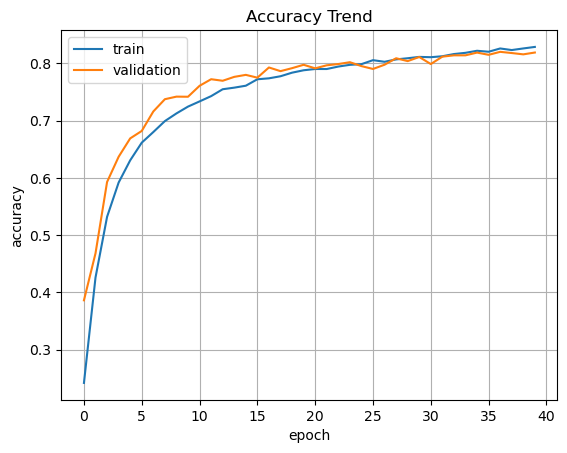

In [12]:
import matplotlib.pyplot as plt

plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Accuracy Trend')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','validation'], loc='best')
plt.grid()
plt.show()

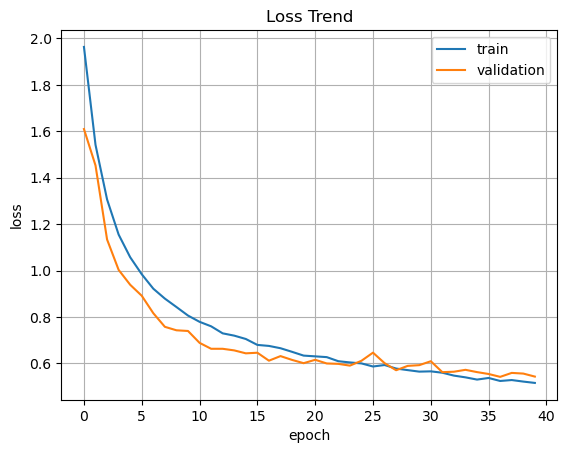

In [13]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Loss Trend')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','validation'], loc='best')
plt.grid()
plt.show()

In [14]:
# 모델 저장

try:
    cnn.save('data/cifar10_accuracy_81v1.h5')
    print('Done !!!')

except Exception as err:

    print(str(err))

Done !!!
